In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# Gráfico para realizar a análise exploratória
def gerarPlot(colunaParaComparar, df):
    df = df.copy()
    df.dropna(inplace=True)
    
    if((df[colunaParaComparar].dtype is not np.dtype('O')) and (df[colunaParaComparar].dtype is not np.dtype('bool') )):
        hist, bins = np.histogram(df[colunaParaComparar],5)
        labels = list()
        
        for i in range(len(bins)-1):
            labels.append("{:.0f}-{:.0f}".format(bins[i],bins[i+1]))
            
        df[colunaParaComparar] = pd.cut(df[colunaParaComparar], bins, labels=labels)
    
    crosstab = pd.crosstab(index=df["Transported"], columns=df[colunaParaComparar]) # é um pandas dataframe
    labels = [str(x) if type(x) == type(True) else x for x in list(df[colunaParaComparar].value_counts().index)] # é preciso converter bool em str pra definir os labels corretamente
    width = 0.35
    
    # Substituir os valores por freq. relativa, invés de freq. absoluta
    for col in crosstab:
        crosstab[col] = crosstab[col]/crosstab[col].sum()    
    
    trueValues = list(crosstab.loc[True])
    
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    ax.bar(labels, df[colunaParaComparar].value_counts(), width)
    ax2.plot(trueValues,'go-')
    ax.legend()
    ax.set_title("Combination Chart")
    ax.set_xlabel(colunaParaComparar)
    ax.set_ylabel("Count")
    ax2.set_ylabel("Transported")
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    plt.show()

# Data Cleaning e Análise Exploratória

<AxesSubplot:>

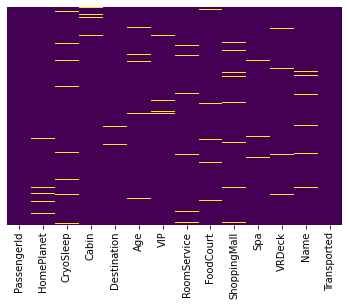

In [6]:
# Checar se existem valores faltantes na base de dados
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


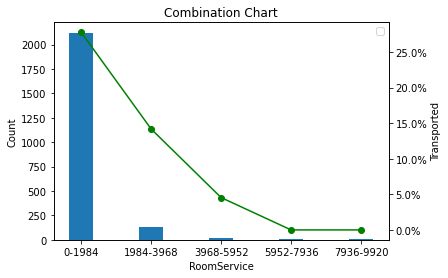

In [7]:
gerarPlot("RoomService", df) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


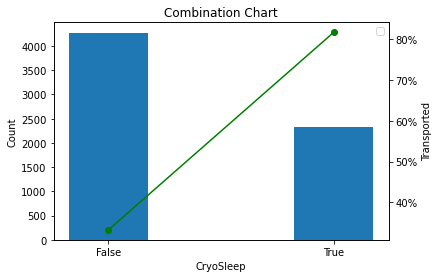

In [8]:
gerarPlot("CryoSleep", df) 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


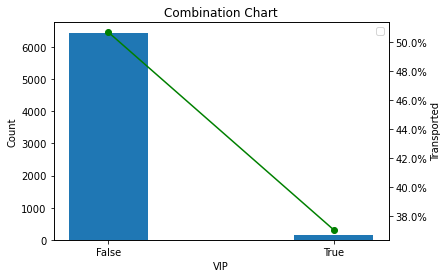

In [9]:
gerarPlot("VIP", df) 

In [52]:
df["Cabin"].nunique()

6560

In [10]:
# Remover colunas
df.drop(["PassengerId","Cabin","Name"], axis=1,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
dummies = pd.get_dummies(df[["HomePlanet","CryoSleep","Destination","VIP"]], drop_first=True)
dummies.head()

,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,1,1
3,1,0,0,0,1,0
4,0,0,0,0,1,0


In [13]:
df.drop(["HomePlanet","CryoSleep","Destination","VIP"],axis=1,inplace=True)

In [14]:
df = pd.concat([df,dummies],axis=1)

In [58]:
df.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,1,0,0,0,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,0,0,0,0,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,0,1,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,1,0,0,0,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,0,0,0,0,1,0


# Regressão Logística

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,7:], 
                                                    df['Transported'], test_size=0.30, 
                                                    random_state=101)

In [31]:
type(df[['Transported']]) != type(df['Transported']) 

True

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [71]:
def data_cleaning(rawDataset):
    rawDataset.drop(["PassengerId","Cabin","Name"], axis=1,inplace=True)
    rawDataset.dropna(inplace=True)
    dummies = pd.get_dummies(rawDataset[["HomePlanet","CryoSleep","Destination","VIP"]], drop_first=True)
    rawDataset = pd.concat([rawDataset,dummies],axis=1)
    rawDataset.drop(["HomePlanet","CryoSleep","Destination","VIP"],axis=1,inplace=True)
    return rawDataset

In [32]:
predictions = model.predict(X_test)
predictions

array([ True,  True, False, ..., False, False,  True])

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       0.68      0.82      0.75      1034
        True       0.78      0.63      0.69      1043

    accuracy                           0.72      2077
   macro avg       0.73      0.72      0.72      2077
weighted avg       0.73      0.72      0.72      2077



In [37]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test,predictions)

array([[849, 185],
       [391, 652]], dtype=int64)

In [41]:
(849+642)/(849+642+391+185)

0.7213352685050798

In [43]:
positive_metrics = classification_report(y_test,predictions)

In [52]:
from sklearn.metrics import roc_curve

In [53]:
roc_curve(y_test,predictions)

(array([0.        , 0.17891683, 1.        ]),
 array([0.        , 0.62511985, 1.        ]),
 array([2, 1, 0]))

In [54]:
from sklearn import metrics

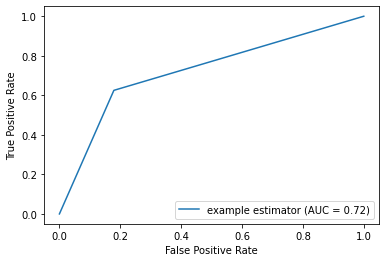

In [58]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(estimator_name='example estimator', fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()